In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Plant_images_pianalytix.zip

Archive:  /content/drive/MyDrive/Plant_images_pianalytix.zip
   creating: Plant_images_pianalytix/
   creating: Plant_images_pianalytix/Corn_(maize)___Common_rust_/
  inflating: Plant_images_pianalytix/Corn_(maize)___Common_rust_/RS_Rust 2469.JPG  
  inflating: Plant_images_pianalytix/Corn_(maize)___Common_rust_/RS_Rust 2470.JPG  
  inflating: Plant_images_pianalytix/Corn_(maize)___Common_rust_/RS_Rust 2471.JPG  
  inflating: Plant_images_pianalytix/Corn_(maize)___Common_rust_/RS_Rust 2472.JPG  
  inflating: Plant_images_pianalytix/Corn_(maize)___Common_rust_/RS_Rust 2473.JPG  
  inflating: Plant_images_pianalytix/Corn_(maize)___Common_rust_/RS_Rust 2474.JPG  
  inflating: Plant_images_pianalytix/Corn_(maize)___Common_rust_/RS_Rust 2475.JPG  
  inflating: Plant_images_pianalytix/Corn_(maize)___Common_rust_/RS_Rust 2476.JPG  
  inflating: Plant_images_pianalytix/Corn_(maize)___Common_rust_/RS_Rust 2477.JPG  
  inflating: Plant_images_pianalytix/Corn_(maize)___Common_rust_/RS_Rust 2478.J

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array,array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

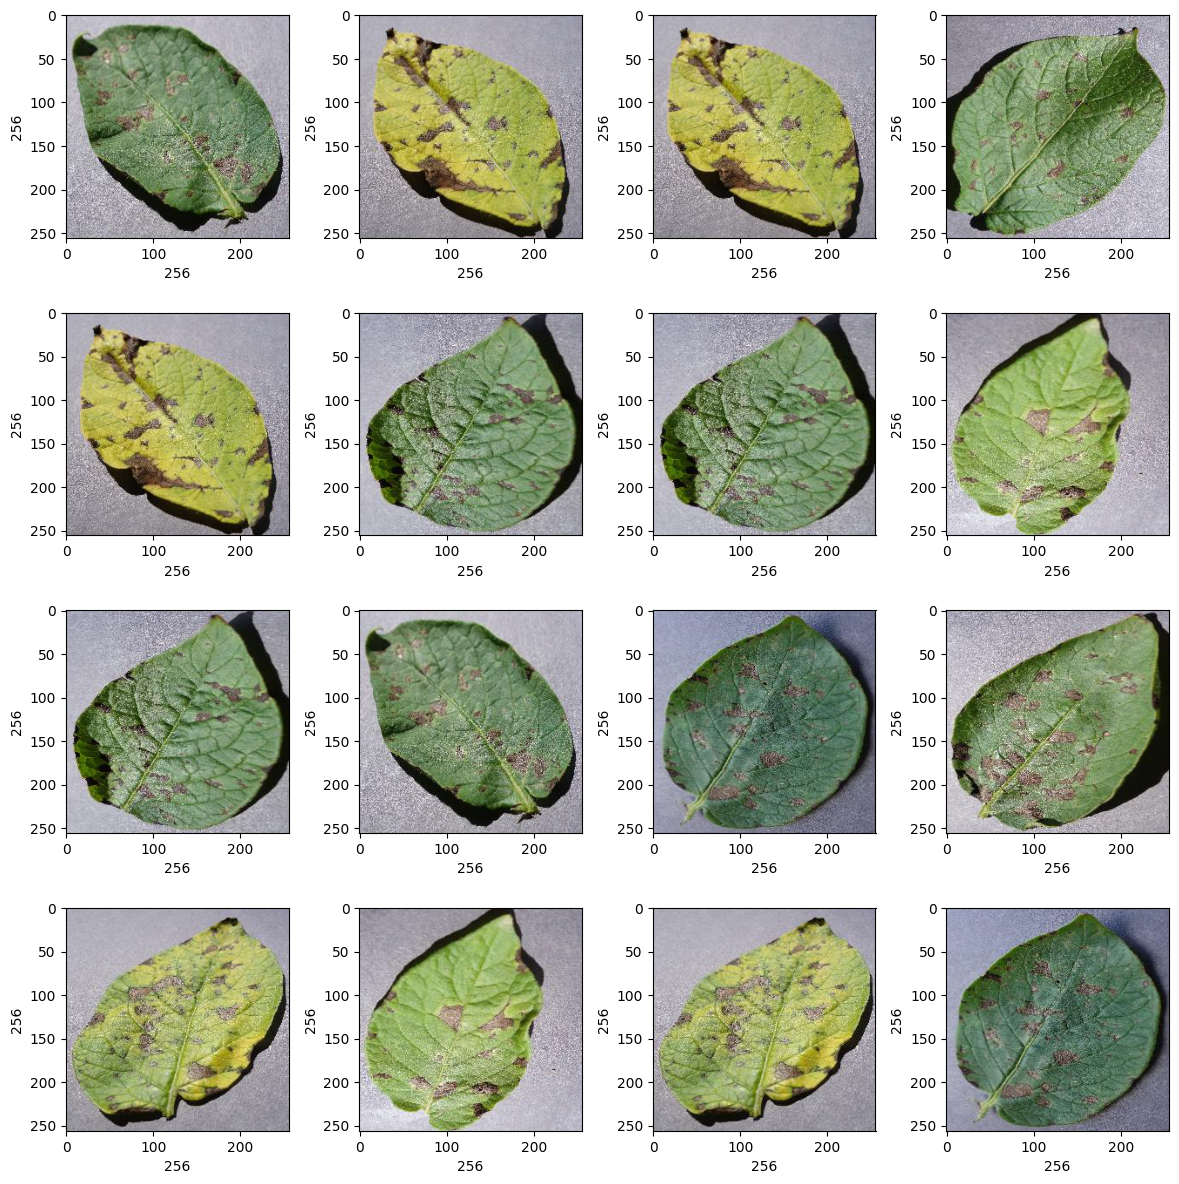

In [4]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [5]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))

            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
dir = "/content/drive/My Drive/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1


for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [7]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

2    300
1     10
dtype: int64

In [8]:
image_list[0].shape

(256, 256, 3)

In [9]:
label_list = np.array(label_list)
label_list.shape

(310,)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [11]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [16]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
2/2 [==============================] - 13s 2s/step - loss: 1.1151 - accuracy: 0.3131 - val_loss: 0.7977 - val_accuracy: 0.9400
Epoch 2/50
2/2 [==============================] - 0s 134ms/step - loss: 0.7133 - accuracy: 0.9697 - val_loss: 0.5577 - val_accuracy: 0.9400
Epoch 3/50
2/2 [==============================] - 0s 135ms/step - loss: 0.4598 - accuracy: 0.9697 - val_loss: 0.4338 - val_accuracy: 0.9400
Epoch 4/50
2/2 [==============================] - 0s 133ms/step - loss: 0.3220 - accuracy: 0.9697 - val_loss: 0.3919 - val_accuracy: 0.9400
Epoch 5/50
2/2 [==============================] - 0s 133ms/step - loss: 0.2535 - accuracy: 0.9697 - val_loss: 0.3900 - val_accuracy: 0.9400
Epoch 6/50
2/2 [==============================] - 0s 138ms/step - loss: 0.2310 - accuracy: 0.9697 - val_loss: 0.4023 - val_accuracy: 0.9400
Epoch 7/50
2/2 [==============================] - 0s 136ms/step - loss: 0.2335 - accuracy: 0.9697 - val_loss: 0.4150 - val_accuracy: 0.9400
Epoch 8/50
2/2 [======

In [17]:
model.save("/content/drive/My Drive/plant_disease.h5")
json_model = model.to_json()
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

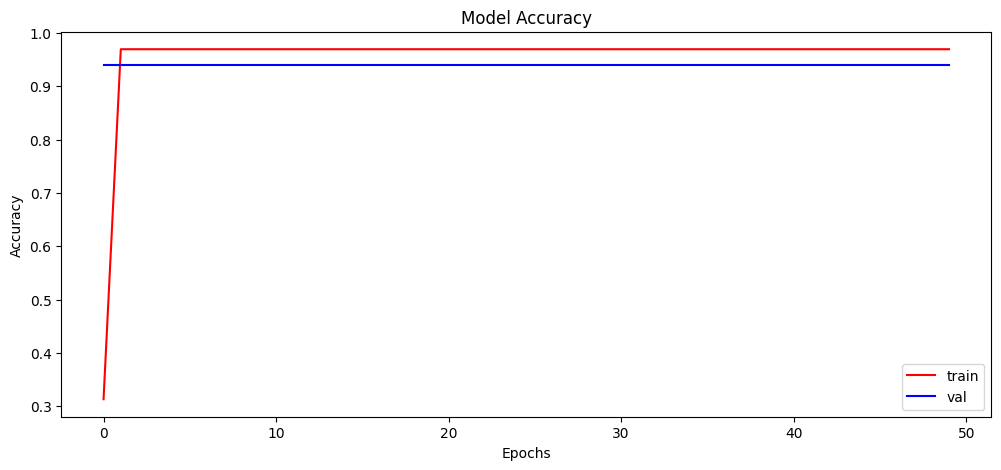

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [19]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2/2 [==============================] - 1s 197ms/step - loss: 0.0322 - accuracy: 0.9839
Test Accuracy: 98.38709831237793


In [20]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 12ms/step


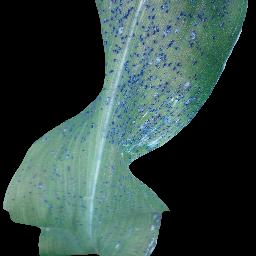

In [21]:
img = array_to_img(x_test[10])
img